<div class="well well-sm">
    
**Note**: This notebook mimics the Seurat Clustering tutorial up to the point where UMAP is called
    
    https://satijalab.org/seurat/v3.1/pbmc3k_tutorial.html
</div>

# To do:
- set `%%R -w 800 -h 450` as the default

In [61]:
import os 
import urllib.request
import subprocess
import rpy2
%load_ext nbtools.r_support

# for setting default plot size see
# https://stackoverflow.com/questions/40745163/jupyter-notebook-rpy2-rmagics-how-to-set-the-default-plot-size
# but its prettybrittle - fails if you call it twice or change after the function is set




@genepattern.build_ui(description="Setup the R and Python environments for the rest of this notebook. Downloads the example dataset to the notebook server.", 
                      parameters={
                            "output_var": {
                                "hide": True,
                            }
})
def notebook_setup():
    %load_ext rpy2.ipython
    import seaborn as sns
    sns.set(rc={'figure.figsize':(8,4.5)})
    os.makedirs('data1/pbmc3k/', exist_ok=True)
    url = 'https://s3-us-west-2.amazonaws.com/10x.files/samples/cell/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz'
    urllib.request.urlretrieve(url, 'data/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz')

    subprocess.run(["tar", "-xvf", "data/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz",
                "--directory", "data/pbmc3k/" ])
    
    
    print("Done.")


The nbtools.r_support extension is already loaded. To reload it, use:
  %reload_ext nbtools.r_support


UIBuilder(description='Setup the R and Python environments for the rest of this notebook. Downloads the exampl…

<div id="header" class="fluid-row" style="color: #333333; font-family: 'Open Sans', arial, sans-serif; font-size: 14px;">
<h1 class="title toc-ignore" style="margin-top: 20px; margin-bottom: 10px; font-size: 38px; padding: 0px; font-family: Ubuntu, Tahoma, 'Helvetica Neue', Helvetica, Arial, sans-serif;">Seurat - Guided Clustering Tutorial</h1>
<h4 class="date" style="margin: 10px 0px; font-size: 18px; padding: 0px; font-family: Ubuntu, Tahoma, 'Helvetica Neue', Helvetica, Arial, sans-serif;">Compiled: October 08, 2019</h4>
</div>
<hr style="overflow: visible; margin: 20px 0px; padding: 0px; color: #333333; font-family: 'Open Sans', arial, sans-serif; font-size: 14px;" />
<div id="setup-the-seurat-object" class="section level3" style="color: #333333; font-family: 'Open Sans', arial, sans-serif; font-size: 14px;">
<h3 style="margin: 20px 0px 10px; font-size: 26px; padding: 0px; font-family: Ubuntu, Tahoma, 'Helvetica Neue', Helvetica, Arial, sans-serif;">Setup the Seurat Object</h3>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify;">For this tutorial, we will be analyzing the a dataset of Peripheral Blood Mononuclear Cells (PBMC) freely available from 10X Genomics. There are 2,700 single cells that were sequenced on the Illumina NextSeq 500. The raw data can be found&nbsp;<a style="color: #dd4814; text-decoration-line: underline;" href="https://s3-us-west-2.amazonaws.com/10x.files/samples/cell/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz">here</a>.</p>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify;">We start by reading in the data. The&nbsp;<code style="font-size: 14.4px; color: inherit; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre;">Read10X</code>&nbsp;function reads in the output of the&nbsp;<a style="color: #dd4814; text-decoration-line: underline;" href="https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/what-is-cell-ranger">cellranger</a>&nbsp;pipeline from 10X, returning a unique molecular identified (UMI) count matrix. The values in this matrix represent the number of molecules for each feature (i.e.&nbsp;gene; row) that are detected in each cell (column).</p>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify;">We next use the count matrix to create a&nbsp;<code style="font-size: 14.4px; color: inherit; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre;">Seurat</code>&nbsp;object. The object serves as a container that contains both data (like the count matrix) and analysis (like PCA, or clustering results) for a single-cell dataset. For a technical discussion of the&nbsp;<code style="font-size: 14.4px; color: inherit; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre;">Seurat</code>&nbsp;object structure, check out our&nbsp;<a style="color: #dd4814; text-decoration-line: underline;" href="https://github.com/satijalab/seurat/wiki">GitHub Wiki</a>. For example, the count matrix is stored in&nbsp;<code style="font-size: 14.4px; color: inherit; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre;">pbmc[["RNA"]]@counts</code>.</p>
</div>

In [20]:
%%r_build_ui { "name": "Setup Seurat Objects", "parameters": { "output_var": { "hide": "True" } } }

setupR <- function(){
    print('Loading libraries')
    library(dplyr)
    library(Seurat)
    fig_height=450
    fig_width=800
    # Load the PBMC dataset
    print('Loading the dataset.')
    pbmc.data <- Read10X(data.dir = "data/pbmc3k/filtered_gene_bc_matrices/hg19/")
    # Initialize the Seurat object with the raw (non-normalized data).
    pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
    print('Done')
    return(pbmc)
}
pbmc <- setupR()

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Setup Seurat Objects', origin='nbtools.r_support', p…

<h3 style="margin: 20px 0px 10px; font-size: 26px; padding: 0px; font-family: Ubuntu, Tahoma, 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #333333;">Standard pre-processing workflow</h3>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify; font-family: 'Open Sans', arial, sans-serif;">The steps below encompass the standard pre-processing workflow for scRNA-seq data in Seurat. These represent the selection and filtration of cells based on QC metrics, data normalization and scaling, and the detection of highly variable features.</p>
<div id="qc-and-selecting-cells-for-further-analysis" class="section level4" style="color: #333333; font-family: 'Open Sans', arial, sans-serif; font-size: 14px;">
<h4 style="margin: 10px 0px; font-size: 18px; padding: 0px; font-family: Ubuntu, Tahoma, 'Helvetica Neue', Helvetica, Arial, sans-serif;">QC and selecting cells for further analysis</h4>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify;">Seurat allows you to easily explore QC metrics and filter cells based on any user-defined criteria. A few QC metrics&nbsp;<a style="color: #dd4814; text-decoration-line: underline;" href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4758103/">commonly used</a>&nbsp;by the community include</p>
<ul style="margin-right: 0px; margin-bottom: 10px; margin-left: 35px; padding: 0px; font-size: 16px;">
<li style="margin-bottom: 5px; text-align: justify;">The number of unique genes detected in each cell.
<ul style="margin-right: 0px; margin-left: 35px; padding: 0px 0px 0px 15px;">
<li style="margin-bottom: 5px; text-align: justify;">Low-quality cells or empty droplets will often have very few genes</li>
<li style="margin-bottom: 5px; text-align: justify;">Cell doublets or multiplets may exhibit an aberrantly high gene count</li>
</ul>
</li>
<li style="margin-bottom: 5px; text-align: justify;">Similarly, the total number of molecules detected within a cell (correlates strongly with unique genes)</li>
<li style="margin-bottom: 5px; text-align: justify;">The percentage of reads that map to the mitochondrial genome
<ul style="margin-right: 0px; margin-left: 35px; padding: 0px 0px 0px 15px;">
<li style="margin-bottom: 5px; text-align: justify;">Low-quality / dying cells often exhibit extensive mitochondrial contamination</li>
<li style="margin-bottom: 5px; text-align: justify;">We calculate mitochondrial QC metrics with the&nbsp;<code style="font-size: 14.4px; color: inherit; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre;">PercentageFeatureSet</code>&nbsp;function, which calculates the percentage of counts originating from a set of features</li>
<li style="margin-bottom: 5px; text-align: justify;">We use the set of all genes starting with&nbsp;<code style="font-size: 14.4px; color: inherit; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre;">MT-</code>&nbsp;as a set of mitochondrial genes</li>
</ul>
</li>
</ul>
</div>

In [28]:
%%r_build_ui { "name": "Add Mitochondrial QC Metrics", "parameters": { "column_name": { "type": "string", "default":"percent.mt" },"pattern": { "type": "string", "default":"MT-" }, "output_var": { "hide": "True" } } }

set_mito_qc <- function(colName, pat) {
    
    pattern <- paste("^", trimws(pat, which = "both"), sep="")
    
    # The [[ operator can add columns to object metadata. This is a great place to stash QC stats
    pbmc[[colName]] <- PercentageFeatureSet(pbmc, pattern = pattern)
    return(pbmc)
}


pbmc <- set_mito_qc(column_name, pattern)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Add Mitochondrial QC Metrics', origin='nbtools.r_sup…

<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify; font-family: 'Open Sans', arial, sans-serif;">In the example below, we visualize QC metrics, and use these to filter cells.</p>
<ul style="margin-right: 0px; margin-bottom: 10px; margin-left: 35px; padding: 0px; font-size: 16px; color: #333333; font-family: 'Open Sans', arial, sans-serif;">
<li style="margin-bottom: 5px; text-align: justify;">We filter cells that have unique feature counts over 2,500 or less than 200</li>
<li style="margin-bottom: 5px; text-align: justify;">We filter cells that have &gt;5% mitochondrial counts</li>
</ul>

In [24]:
%%r_build_ui { "width": 10, "height": 300, "name": "Triple Violin Plot", "parameters": { "first_feature": { "type": "string", "default":"nFeature_RNA" }, "second_feature":{ "type": "string", "default":"nCount_RNA"}, "third_feature": { "type": "string", "default":"percent.mt" }, "output_var":{"hide":"True"} } } 
# Visualize QC metrics as a violin plot
#VlnPlot(pbmc, features = c(first_feature, second_feature, third_feature), ncol = 3)
tripleViolin <- function(first, second, third){
     
    feats <- c(first, second, third)
    plot(VlnPlot(pbmc, features = feats, ncol = 3, combine=TRUE), fig.height=5, fig.width=15)
    return("")
}

tripleViolin(first_feature, second_feature, third_feature)


UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Triple Violin Plot', origin='nbtools.r_support', par…

In [30]:
%%r_build_ui { "name": "Double Scatter Plot", "parameters": { "x_axis": { "type": "String", "default":"nCount_RNA" }, "y1": { "type": "string", "default":"percent.mt"}, "y2": {"type":"string", "default":"nFeature_RNA" }, "output_var": {"hide": "True"}  } }
# %%R -w 800 -h 450
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.
Feature_Scatter_Plot <- function(first_x, first_y, second_y){
    plot1 <- FeatureScatter(pbmc, feature1 = first_x, feature2 = first_y)
    plot2 <- FeatureScatter(pbmc, feature1 = first_x, feature2 = second_y)
    plot(CombinePlots(plots = list(plot1, plot2)))
    return("")
}
Feature_Scatter_Plot(x_axis,y1,y2)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Double Scatter Plot', origin='nbtools.r_support', pa…

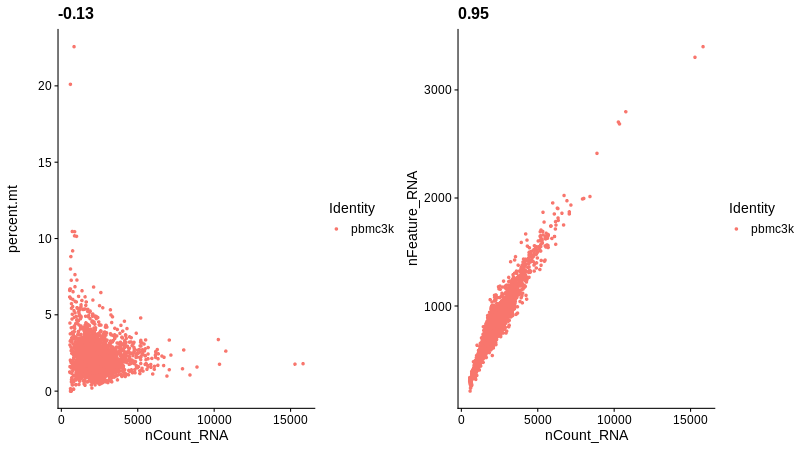

In [5]:
%%R -w 800 -h 450
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

### This does the filtering

<h3 style="margin: 20px 0px 10px; font-size: 26px; padding: 0px; font-family: Ubuntu, Tahoma, 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #333333;">Normalizing the data</h3>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify; font-family: 'Open Sans', arial, sans-serif;">After removing unwanted cells from the dataset, the next step is to normalize the data. By default, we employ a global-scaling normalization method &ldquo;LogNormalize&rdquo; that normalizes the feature expression measurements for each cell by the total expression, multiplies this by a scale factor (10,000 by default), and log-transforms the result. Normalized values are stored in&nbsp;<code style="font-size: 14.4px; color: inherit; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre;">pbmc[["RNA"]]@data</code>.</p>

## THIS SUBSET IS NOT mentioned IN THE SEURAT TUTORIAL -- Need a description?

In [32]:
%%r_build_ui { "name": "Subset Data", "parameters": { "min_n_features": { "type": "numvber", "default":"200" },"max_n_features": { "type": "numvber", "default":"2500" },"max_percent_mitochondrial": { "type": "number", "default":"5" }, "output_var": { "hide": "True" } } }

my_subset <- function(min_n, max_n, max_mito){
    pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)
    return(pbmc)
}

pbmc <- my_subset(min_n_features, max_n_features, max_percent_mitochonrial)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Subset Data', origin='nbtools.r_support', params=[{'…

In [41]:
%%R
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

### This normalizes

In [34]:
%%r_build_ui { "name": "Normalize", "parameters": { "method": { "type": "string", "default":"LogNormalize" },"scale_factor": { "type": "number", "default":"10000" }, "output_var": { "hide": "True" } } }

norm_pbmc <- function(meth, scale){
    pbmc <- NormalizeData(pbmc, normalization.method = meth, scale.factor = scale)
    return(pbmc)
}

pbmc <- norm_pbmc(method, scale_factor)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Normalize', origin='nbtools.r_support', params=[{'na…

### Q> Do we want to keep this repetitive bit?

I'm prety sure this is unnecesary/repetitive, since above are the defaults. But adding it for completeness:

<p><span style="color: #373d3f; font-family: 'Open Sans', arial, sans-serif; font-size: 16px; text-align: justify;">For clarity, in this previous line of code (and in future commands), we provide the default values for certain parameters in the function call. However, this isn&rsquo;t required and the same behavior can be achieved with:</span></p>

In [8]:
%%R
pbmc <- NormalizeData(pbmc)

R[write to console]: Performing log-normalization

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to conso

<h3 style="margin: 20px 0px 10px; font-size: 26px; padding: 0px; font-family: Ubuntu, Tahoma, 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #333333;">Identification of highly variable features (feature selection)</h3>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify; font-family: 'Open Sans', arial, sans-serif;">We next calculate a subset of features that exhibit high cell-to-cell variation in the dataset (i.e, they are highly expressed in some cells, and lowly expressed in others). We and&nbsp;<a style="color: #dd4814; text-decoration-line: underline;" href="https://www.nature.com/articles/nmeth.2645">others</a>&nbsp;have found that focusing on these genes in downstream analysis helps to highlight biological signal in single-cell datasets.</p>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify; font-family: 'Open Sans', arial, sans-serif;">Our procedure in Seurat3 is described in detail&nbsp;<a style="color: #dd4814; text-decoration-line: underline;" href="https://www.biorxiv.org/content/early/2018/11/02/460147.full.pdf">here</a>, and improves on previous versions by directly modeling the mean-variance relationship inherent in single-cell data, and is implemented in the&nbsp;<code style="font-size: 14.4px; color: inherit; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre;">FindVariableFeatures</code>&nbsp;function. By default, we return 2,000 features per dataset. These will be used in downstream analysis, like PCA.</p>

In [36]:
%%r_build_ui { "name": "Feature Selection", "parameters": { "method": { "type": "string", "default":"vst" },"num_features": { "type": "number", "default":"2000" }, "num_to_label":{"type": "number", "default": "10", "description": "label the top N features in the plot."}, "output_var": { "hide": "True" } } }
#%%R -w 800 -h 450

feat_sel_plot <- function(meth, nFeat, nLabel){
    pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

    # Identify the 10 most highly variable genes
    top10 <- head(VariableFeatures(pbmc), 10)

    # plot variable features with and without labels
    plot1 <- VariableFeaturePlot(pbmc)
    plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
    plot(plot2)
    #plot(CombinePlots(plots = list(plot1, plot2)))
    return(pbmc)
}

pbmc <- feat_sel_plot(method, num_features, num_to_label)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Feature Selection', origin='nbtools.r_support', para…

R[write to console]: Calculating gene variances
R[write to console]: 

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]

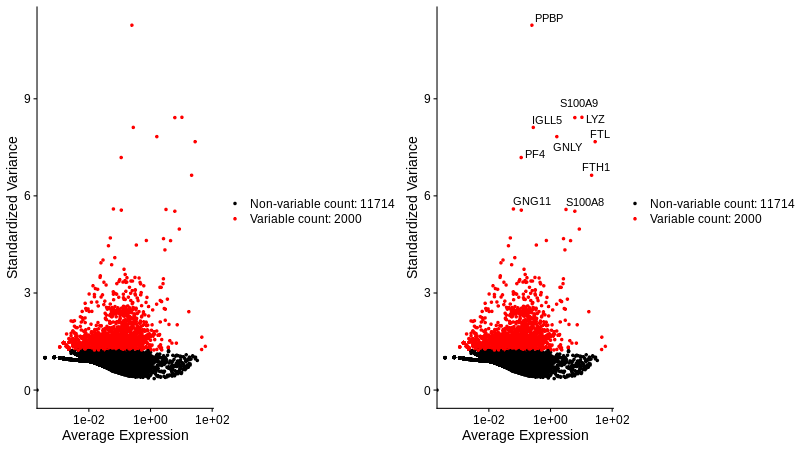

In [9]:
%%R -w 800 -h 450
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))

<h3 style="margin: 20px 0px 10px; font-size: 26px; padding: 0px; font-family: Ubuntu, Tahoma, 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #333333;">Scaling the data</h3>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify; font-family: 'Open Sans', arial, sans-serif;">Next, we apply a linear transformation (&lsquo;scaling&rsquo;) that is a standard pre-processing step prior to dimensional reduction techniques like PCA. The&nbsp;<code style="font-size: 14.4px; color: inherit; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre;">ScaleData</code>&nbsp;function:</p>
<ul style="margin-right: 0px; margin-bottom: 10px; margin-left: 35px; padding: 0px; font-size: 16px; color: #333333; font-family: 'Open Sans', arial, sans-serif;">
<li style="margin-bottom: 5px; text-align: justify;">Shifts the expression of each gene, so that the mean expression across cells is 0</li>
<li style="margin-bottom: 5px; text-align: justify;">Scales the expression of each gene, so that the variance across cells is 1
<ul style="margin-right: 0px; margin-left: 35px; padding: 0px 0px 0px 15px;">
<li style="margin-bottom: 5px; text-align: justify;">This step gives equal weight in downstream analyses, so that highly-expressed genes do not dominate</li>
</ul>
</li>
<li style="margin-bottom: 5px; text-align: justify;">The results of this are stored in&nbsp;<code style="font-size: 14.4px; color: inherit; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre;">pbmc[["RNA"]]@scale.data</code></li>
</ul>

In [38]:
%%r_build_ui {"name": "Scale Data", "parameters": {"output_var":{"hide": "True"}}}
myscale <- function(pbmc){
    all.genes <- rownames(pbmc)
    pbmc <- ScaleData(pbmc, features = all.genes)
    return(pbmc)
}
pbmc <- myscale(pbmc)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Scale Data', origin='nbtools.r_support', params=[{'n…

In [10]:
%%R
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

R[write to console]: Centering and scaling data matrix

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |=====                                                                 |   7%
  |                                                                            
  |==========                                                            |  14%
  |                                                                            
  |===============                                                       |  21%
  |                                                                            
  |====================                                                  |  29%
  |                                                                            
  |=========================                                    

<h3 style="margin: 20px 0px 10px; font-size: 26px; padding: 0px; font-family: Ubuntu, Tahoma, 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #333333;">Perform linear dimensional reduction</h3>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify; font-family: 'Open Sans', arial, sans-serif;">Next we perform PCA on the scaled data. By default, only the previously determined variable features are used as input, but can be defined using&nbsp;<code style="font-size: 14.4px; color: inherit; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre;">features</code>&nbsp;argument if you wish to choose a different subset.</p>

In [56]:
%%R 
feats <- VariableFeatures(object = pbmc)
pbmc <-RunPCA(pbmc, features = feats, nfeatures.print=5 )

PC_ 1 
Positive:  FTL, FTH1, CST3, AIF1, S100A4 
Negative:  MALAT1, IL32, LTB, IL7R, CCL5 
PC_ 2 
Positive:  S100A8, S100A9, LYZ, CD14, LGALS2 
Negative:  B2M, NKG7, GZMA, CTSW, PRF1 
PC_ 3 
Positive:  CD74, HLA-DRA, HLA-DPB1, HLA-DQA1, HLA-DQB1 
Negative:  PPBP, GNG11, SPARC, PF4, AP001189.4 
PC_ 4 
Positive:  CD74, HLA-DQA1, HLA-DQB1, HLA-DQA2, HLA-DRA 
Negative:  FCGR3A, NKG7, FTL, RP11-290F20.3, S100A4 
PC_ 5 
Positive:  FCGR3A, RP11-290F20.3, MS4A7, MALAT1, CKB 
Negative:  NKG7, LYZ, S100A9, S100A8, GNLY 


In [41]:
%%r_build_ui {"name":"Perform PCA", "parameters":{"output_var":{"hide":"True"}}}

mypca <-function(pbmc){ 
    feats <- VariableFeatures(object = pbmc)
    pbmc <-RunPCA(pbmc, features = feats, nfeatures.print=5)
   
    return(pbmc)
}
pbmc <- mypca(pbmc)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Perform PCA', origin='nbtools.r_support', params=[{'…

In [50]:
%%R
print(pbmc[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  FTL, FTH1, CST3, AIF1, S100A4 
Negative:  MALAT1, IL32, LTB, IL7R, CCL5 
PC_ 2 
Positive:  S100A8, S100A9, LYZ, CD14, LGALS2 
Negative:  B2M, NKG7, GZMA, CTSW, PRF1 
PC_ 3 
Positive:  CD74, HLA-DRA, HLA-DPB1, HLA-DQA1, HLA-DQB1 
Negative:  PPBP, GNG11, SPARC, PF4, AP001189.4 
PC_ 4 
Positive:  CD74, HLA-DQA1, HLA-DQB1, HLA-DQA2, HLA-DRA 
Negative:  FCGR3A, NKG7, FTL, RP11-290F20.3, S100A4 
PC_ 5 
Positive:  FCGR3A, RP11-290F20.3, MS4A7, MALAT1, CKB 
Negative:  NKG7, LYZ, S100A9, S100A8, GNLY 


In [11]:
%%R
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, HLA-DPA

<p><span style="color: #373d3f; font-family: 'Open Sans', arial, sans-serif; font-size: 16px; text-align: justify;">Seurat provides several useful ways of visualizing both cells and features that define the PCA, including&nbsp;</span><code style="font-size: 14.4px; color: #373d3f; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre; text-align: justify;">VizDimReduction</code><span style="color: #373d3f; font-family: 'Open Sans', arial, sans-serif; font-size: 16px; text-align: justify;">,&nbsp;</span><code style="font-size: 14.4px; color: #373d3f; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre; text-align: justify;">DimPlot</code><span style="color: #373d3f; font-family: 'Open Sans', arial, sans-serif; font-size: 16px; text-align: justify;">, and&nbsp;</span><code style="font-size: 14.4px; color: #373d3f; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre; text-align: justify;">DimHeatmap</code></p>

In [43]:
%%r_build_ui {"name":"Examine Features", "parameters": {"num_dims": {"type":"number", "default":"5"}, "num_features":{"type":"number", "default":"5"}, "output_var": {"hide": "True"} }}

ex_feats <- function(dim, nFeat){
    n_dims = 1:dim
    print(n_dims)
    print(pbmc[["pca"]], dims = n_dims, nfeatures = nFeat)
    return("")
}
ex_feats(num_dims, num_features)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Examine Features', origin='nbtools.r_support', param…

In [12]:
%%R
# Examine and visualize PCA results a few different ways
print(pbmc[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL 
Negative:  MALAT1, LTB, IL32, IL7R, CD2 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1 
Negative:  PPBP, PF4, SDPR, SPARC, GNG11 
PC_ 4 
Positive:  HLA-DQA1, CD79B, CD79A, MS4A1, HLA-DQB1 
Negative:  VIM, IL7R, S100A6, IL32, S100A8 
PC_ 5 
Positive:  GZMB, NKG7, S100A8, FGFBP2, GNLY 
Negative:  LTB, IL7R, CKB, VIM, MS4A7 


In [45]:
%%r_build_ui {"name":"Vizualize Dimension Loadings", "parameters": {"num_dims": {"type":"string", "default":"2"}, "output_var": {"hide": "True"} }}

vdl <- function(nDims){
    dim_range = c(1,strtoi(nDims))
    print(VizDimLoadings(pbmc, dims = dim_range, reduction = "pca"))
    return("")
}
vdl(num_dims)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Vizualize Dimension Loadings', origin='nbtools.r_sup…

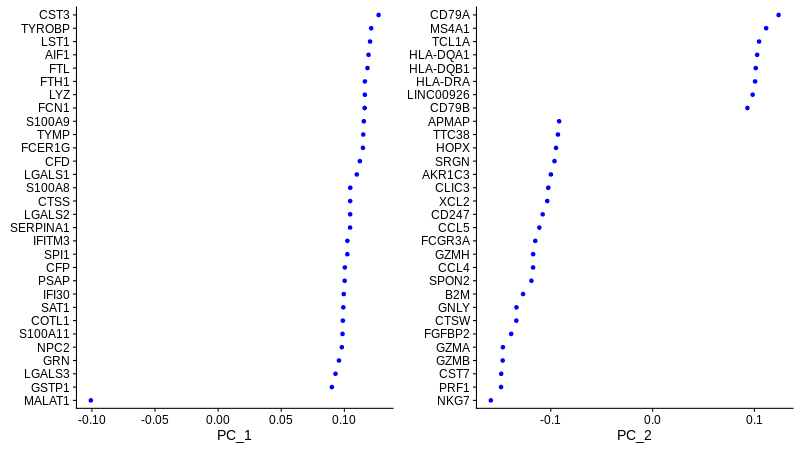

In [13]:
%%R -w 800 -h 450
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

In [47]:
%%r_build_ui {"name":"Vizualize Dimension Plot", "parameters": { "output_var": {"hide": "True"} }}

vdp <- function(p1){
    
    plot(DimPlot(pbmc, reduction = "pca"))
    return("")
}
vdp()

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Vizualize Dimension Plot', origin='nbtools.r_support…

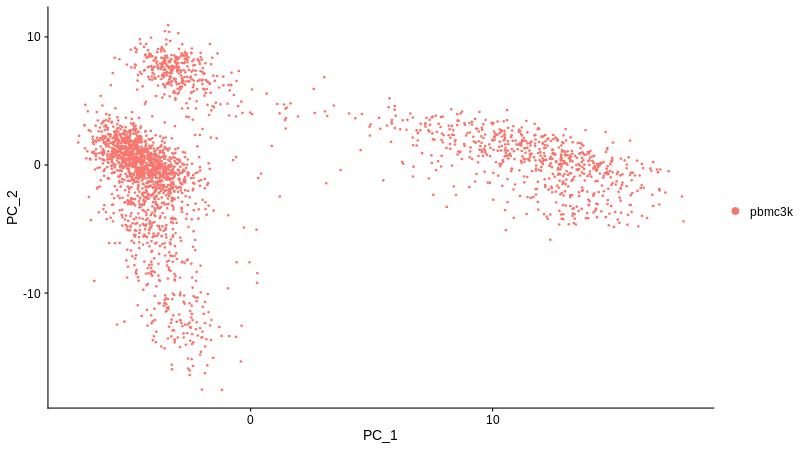

In [14]:
%%R -w 800 -h 450
DimPlot(pbmc, reduction = "pca")

<p><span style="color: #373d3f; font-family: 'Open Sans', arial, sans-serif; font-size: 16px; text-align: justify;">In particular&nbsp;</span><code style="font-size: 14.4px; color: #373d3f; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre; text-align: justify;">DimHeatmap</code><span style="color: #373d3f; font-family: 'Open Sans', arial, sans-serif; font-size: 16px; text-align: justify;">&nbsp;allows for easy exploration of the primary sources of heterogeneity in a dataset, and can be useful when trying to decide which PCs to include for further downstream analyses. Both cells and features are ordered according to their PCA scores. Setting&nbsp;</span><code style="font-size: 14.4px; color: #373d3f; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre; text-align: justify;">cells</code><span style="color: #373d3f; font-family: 'Open Sans', arial, sans-serif; font-size: 16px; text-align: justify;">&nbsp;to a number plots the &lsquo;extreme&rsquo; cells on both ends of the spectrum, which dramatically speeds plotting for large datasets. Though clearly a supervised analysis, we find this to be a valuable tool for exploring correlated feature sets.</span></p>

In [147]:
%%R

DimHeatmap(pbmc, dims = c(1:1), cells = c, balanced = TRUE)

R[write to console]: Error in head.default(x = rownames(x = data), n = num) : 
  length(n) == 1L is not TRUE
Calls: <Anonymous> ... TopCells -> Top -> head -> head -> head.default -> stopifnot




Error in head.default(x = rownames(x = data), n = num) : 
  length(n) == 1L is not TRUE
Calls: <Anonymous> ... TopCells -> Top -> head -> head -> head.default -> stopifnot


In [51]:
%%r_build_ui {"name":"DimHeatMap", "parameters": { "num_dims":{"type":"string", "default": "1"}, "cells":{"type": "number","default":"500"}, "output_var": {"hide": "True"} }}

vdhm <- function(nd,c){    
    if (nd == 1){
        dim_range = 1
    } else {
        dim_range = c(1:strtoi(nd))
    }
    
    print(DimHeatmap(pbmc, dims = dim_range, cells = c, balanced = TRUE))
    return(pbmc)
}
vdhm(num_dims, cells)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='DimHeatMap', origin='nbtools.r_support', params=[{'n…

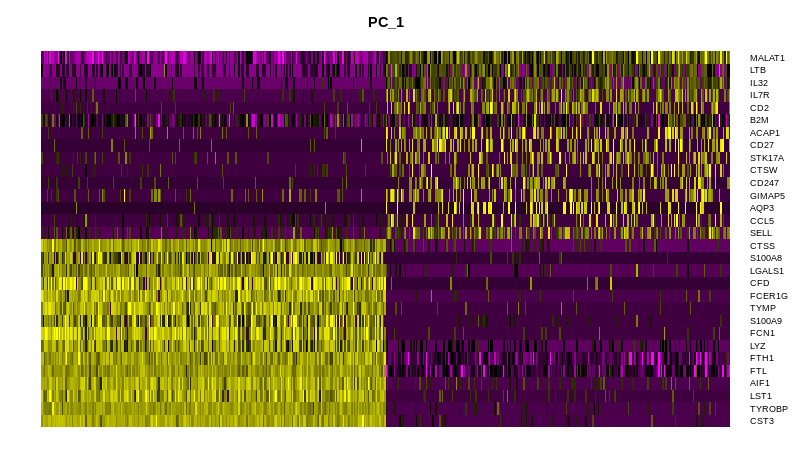

In [15]:
%%R -w 800 -h 450
DimHeatmap(pbmc, dims = 1, cells = 500, balanced = TRUE)

<div class="alert alert-warning">
<p class="lead"> Warning <i class="fa fa-exclamation-triangle"></i></p>
This figure needs better display
</div>

In [53]:
%%r_build_ui {"name":"DimHeatMap", "parameters": { "num_dims":{"type":"string", "default": "15"}, "cells":{"type": "number","default":"500"}, "output_var": {"hide": "True"} }}

vdhm(num_dims, cells)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='DimHeatMap', origin='nbtools.r_support', params=[{'n…

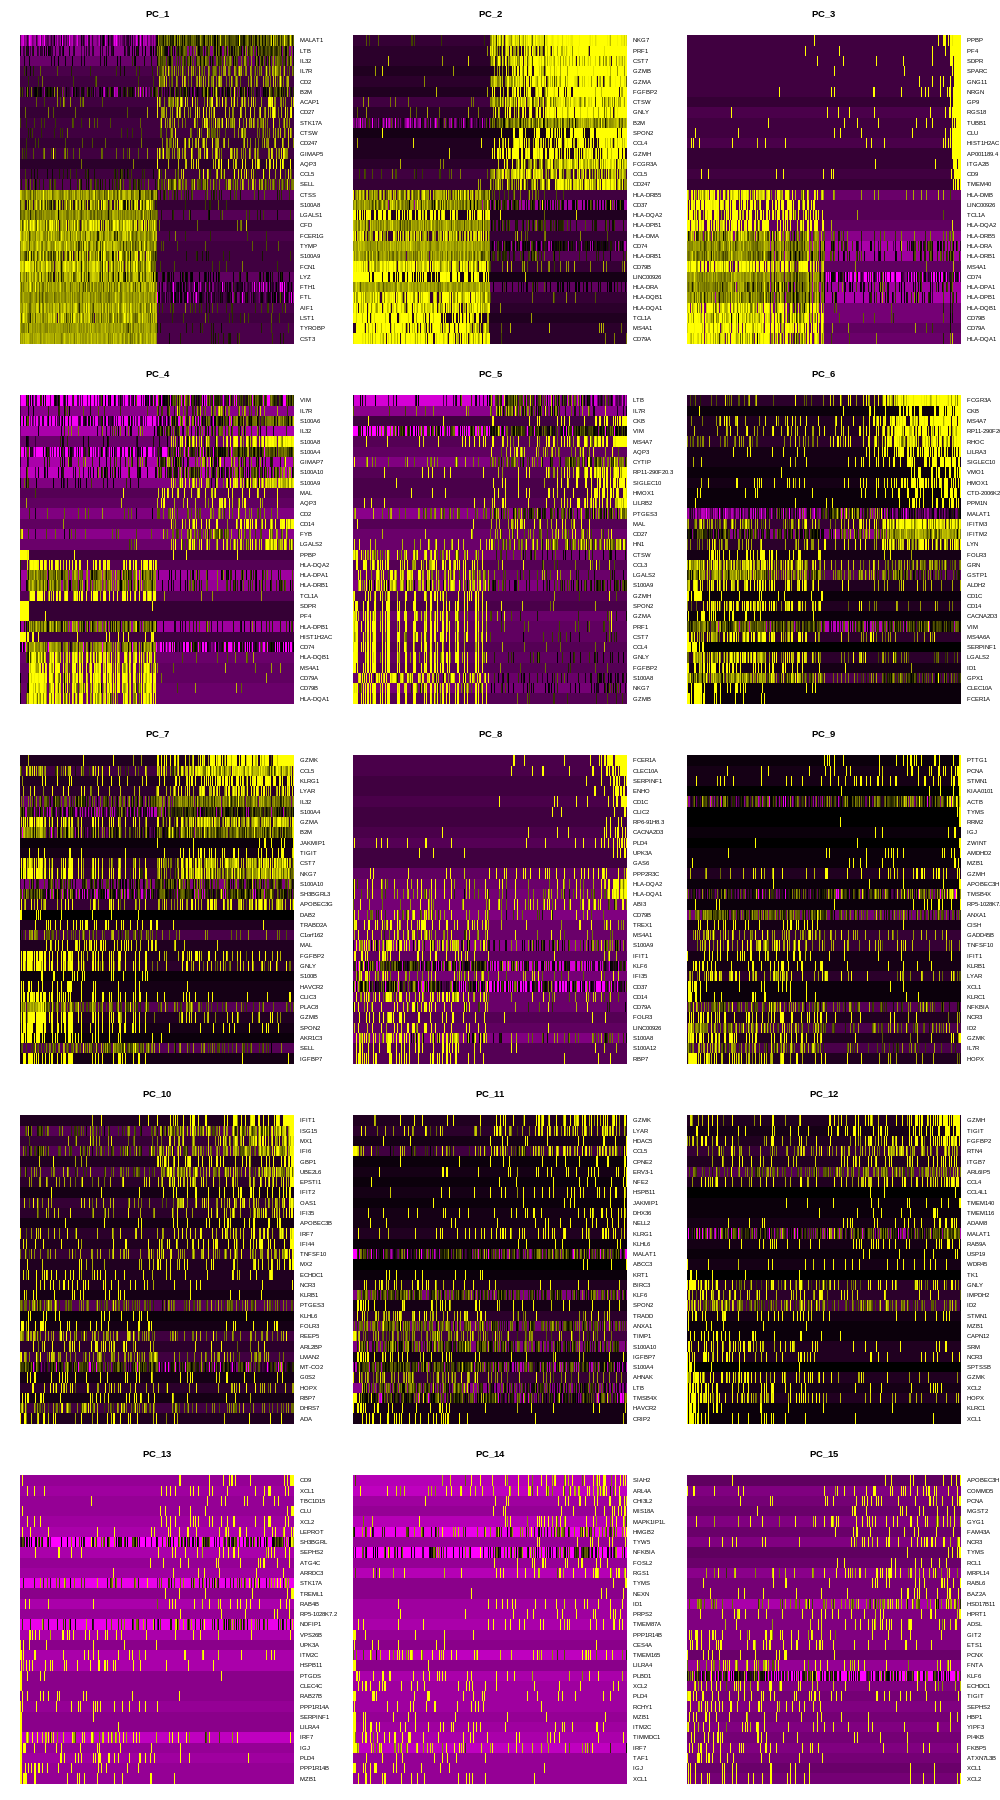

In [21]:
%%R -w 1000 -h 1800
DimHeatmap(pbmc, dims = 1:15, cells = 500, balanced = TRUE)

<h3 style="margin: 20px 0px 10px; font-size: 26px; padding: 0px; font-family: Ubuntu, Tahoma, 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #333333;">Determine the &lsquo;dimensionality&rsquo; of the dataset</h3>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify; font-family: 'Open Sans', arial, sans-serif;">To overcome the extensive technical noise in any single feature for scRNA-seq data, Seurat clusters cells based on their PCA scores, with each PC essentially representing a &lsquo;metafeature&rsquo; that combines information across a correlated feature set. The top principal components therefore represent a robust compression of the dataset. However, how many componenets should we choose to include? 10? 20? 100?</p>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify; font-family: 'Open Sans', arial, sans-serif;">In&nbsp;<a style="color: #dd4814; text-decoration-line: underline;" href="http://www.cell.com/abstract/S0092-8674(15)00549-8">Macosko&nbsp;<em>et al</em></a>, we implemented a resampling test inspired by the JackStraw procedure. We randomly permute a subset of the data (1% by default) and rerun PCA, constructing a &lsquo;null distribution&rsquo; of feature scores, and repeat this procedure. We identify &lsquo;significant&rsquo; PCs as those who have a strong enrichment of low p-value features.</p>

### Q. Why jackstraw on 1:20 then plot only 1:15 dims?

In [56]:
%%r_build_ui {"name":"Jack Straw Plot", "parameters": { "num_replicate":{"type":"number", "default": "100"}, "dims":{"type": "string","default":"1:20"}, "output_var": {"hide": "True"} }}

jsp <- function(num_rep, dimStr){
    dims <- eval(dimStr)
    pbmc <- JackStraw(pbmc, num.replicate = num_rep)
    pbmc <- ScoreJackStraw(pbmc, dims = 1:20)
    plot(JackStrawPlot(pbmc, dims = 1:15))
    return("")
}
jsp(num_replicate, dims)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Jack Straw Plot', origin='nbtools.r_support', params…

In [22]:
%%R
# NOTE: This process can take a long time for big datasets, comment out for expediency. More
# approximate techniques such as those implemented in ElbowPlot() can be used to reduce
# computation time
pbmc <- JackStraw(pbmc, num.replicate = 100)
pbmc <- ScoreJackStraw(pbmc, dims = 1:20)

<p><span style="color: #373d3f; font-family: 'Open Sans', arial, sans-serif; font-size: 16px; text-align: justify;">The&nbsp;</span><code style="font-size: 14.4px; color: #373d3f; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre; text-align: justify;">JackStrawPlot</code><span style="color: #373d3f; font-family: 'Open Sans', arial, sans-serif; font-size: 16px; text-align: justify;">&nbsp;function provides a visualization tool for comparing the distribution of p-values for each PC with a uniform distribution (dashed line). &lsquo;Significant&rsquo; PCs will show a strong enrichment of features with low p-values (solid curve above the dashed line). In this case it appears that there is a sharp drop-off in significance after the first 10-12 PCs.</span></p>

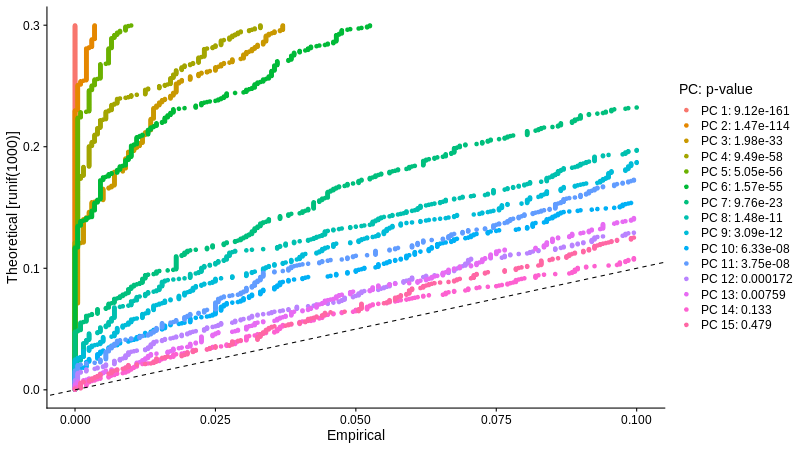

In [23]:
%%R -w 800 -h 450
JackStrawPlot(pbmc, dims = 1:15)

<p><span style="color: #373d3f; font-family: 'Open Sans', arial, sans-serif; font-size: 16px; text-align: justify;">An alternative heuristic method generates an &lsquo;Elbow plot&rsquo;: a ranking of principle components based on the percentage of variance explained by each one (</span><code style="font-size: 14.4px; color: #373d3f; word-break: break-word; border: 1px solid #9ba4a7; border-radius: 4px; background-color: rgba(0, 0, 0, 0.04); white-space: pre; text-align: justify;">ElbowPlot</code><span style="color: #373d3f; font-family: 'Open Sans', arial, sans-serif; font-size: 16px; text-align: justify;">&nbsp;function). In this example, we can observe an &lsquo;elbow&rsquo; around PC9-10, suggesting that the majority of true signal is captured in the first 10 PCs.</span></p>

In [58]:
%%r_build_ui {"name":"Elbow Plot", "parameters": {  "output_var": {"hide": "True"} }}
ebp <- function(){
    plot(ElbowPlot(pbmc))
    return(pbmc)
}
ebp()

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Elbow Plot', origin='nbtools.r_support', params=[{'n…

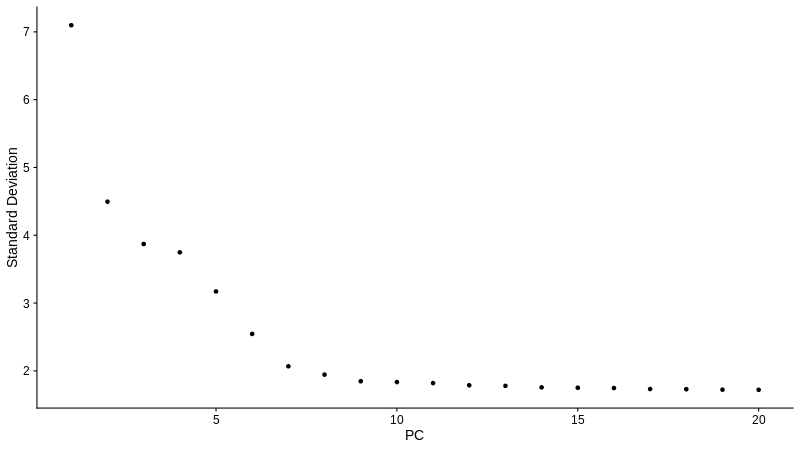

In [24]:
%%R -w 800 -h 450
ElbowPlot(pbmc)

<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify; font-family: 'Open Sans', arial, sans-serif;">dentifying the true dimensionality of a dataset &ndash; can be challenging/uncertain for the user. We therefore suggest these three approaches to consider. The first is more supervised, exploring PCs to determine relevant sources of heterogeneity, and could be used in conjunction with GSEA for example. The second implements a statistical test based on a random null model, but is time-consuming for large datasets, and may not return a clear PC cutoff. The third is a heuristic that is commonly used, and can be calculated instantly. In this example, all three approaches yielded similar results, but we might have been justified in choosing anything between PC 7-12 as a cutoff.</p>
<p style="margin-bottom: 10px; padding: 0px; color: #373d3f; font-size: 16px; text-align: justify; font-family: 'Open Sans', arial, sans-serif;">We chose 10 here, but encourage users to consider the following:</p>
<ul style="margin-right: 0px; margin-bottom: 10px; margin-left: 35px; padding: 0px; font-size: 16px; color: #333333; font-family: 'Open Sans', arial, sans-serif;">
<li style="margin-bottom: 5px; text-align: justify;">Dendritic cell and NK aficionados may recognize that genes strongly associated with PCs 12 and 13 define rare immune subsets (i.e.&nbsp;MZB1 is a marker for plasmacytoid DCs). However, these groups are so rare, they are difficult to distinguish from background noise for a dataset of this size without prior knowledge.</li>
<li style="margin-bottom: 5px; text-align: justify;">We encourage users to repeat downstream analyses with a different number of PCs (10, 15, or even 50!). As you will observe, the results often do not differ dramatically.</li>
<li style="margin-bottom: 5px; text-align: justify;">We advise users to err on the higher side when choosing this parameter. For example, performing downstream analyses with only 5 PCs does signifcanltly and adversely affect results.</li>
</ul>

<div class="well well-sm">
Export to RDATA file ("save")
</div>

In [59]:
%%r_build_ui {"name":"Save preprocessed dataset", "parameters": {  "file_name": {"default":"pbmc_preprocessed.rds"}, "output_var": {"hide": "True"} }}
save_it <- function(fileName){
    saveRDS(pbmc, file = fileName)
    return(pbmc)
}
save_it(file_name)

UIBuilder(function_import='nbtools._tmp_r_wrapper', name='Save preprocessed dataset', origin='nbtools.r_suppor…

## Add conclusions/next steps section